Herkese merhaba. Bu proje, veri analizi adına öğrendiklerimi ilk defa uyguladığım çalışmam. Çalışmamı gerçekleştirirken Udacity'den takip ettiğim 'Intro to Data Analysis' dersine müteakip, bu derste öğrendiklerimi farklı kaynaklardan edindiğim bilgi ve yöntemlerle destekledim. Projemin öznesi olan veri setini Kaggle'dan edindiğim, 1912 yılında çıktığı ilk seferinde bir buzdağına çarparak batan Titanic gemisi yolcularına ait veriler oluşturmaktadır. Aynı zamanda veri analizine yeni başlayanlar için oldukça popüler olan bu veri seti, aşağıda da görüleceği üzere 891 yolcuya ait yolcu no, hayatta kalma/kalmama, yolculuk sınıfı, isim, cinsiyet, yaş, eş/kardeş sayısı, ebeveyn/çocuk sayısı, bilet kodu, bilet ücreti, kabin no ve biniş limanlarına ait bilgileri barındıran 12 sütundan oluşmaktadır.
Çalışmamın içeriğinde yer alan hücrelerde # ile başlayan yorum/bilgi satırlarını, yabancı blog ziyaretçilerinin de yararlanabilmesi için İngilizce dilinde yazdım. Projem temel düzeyde bir veri analizi olup tanımlayıcı istatistiğin uygulandığı bir örnektir. 


Analize başlamadan öncelikle veri setini inceleyerek yanıtını aradığım soruları belirledim. Buna göre aklıma gelen ilk sorular yolcuların cinsiyet, yaş ve yolcu sınıflarına göre dağılımları ve bu sınıflandırmalara göre hayatta kalma oranlarıydı. Bu çalışmamdaki öncelikli amacım öğrendiklerimi pratiğe dönüştürmek olduğu için analizde ilerledikçe görselleştirmelerle birlikte soru soruyu doğurdu, fakat burada içeriği uzatmamak adına elde ettiğim bulguları sınırlı tuttum. 

Projemin kodlama dili Python 2'dir. Veri manipülasyonu ('data manipulation') için pandas, veri görselleştirme ('data visualization') için matplotlib ve seaborn kütüphanelerini kullandım. Yer yer de sonucu elde etmede alternatif kod olarak  numpy kütüphanesi kullandım. 

Veri setini bu linkten indirebilirsiniz. Veri setine ait bilgilendirme notu:
Değişken	Tanımı	           Anahtar
Survival	Hayatta kalma	   0 = Hayır, 1 = Evet
Pclass	    Bilet sınıfı	   1 = Birinci, 2 = İkinci, 3 = Üçüncü sınıf
Sex	        Cinsiyet	
Age	        Yaş	   
sibsp	    # yolcunun gemide bulunan kardeş / eş sayısı	
parch	    # yolcunun gemide bulunan ebeveyn / çocuğu sayısı 	
ticket	    Bilet numarası	
fare	    Bilet ücreti	
cabin	    Kamara numarası	
embarked	Gemiye biniş limanı	C = Cherbourg, Q = Queenstown, S = Southampton

İlk olarak ilgili kütüphanelerimizi çağırıyoruz ve veri setimizi okutuyoruz. (Programlama jargonuna hakim değilim, hatam olursa şimdiden affola :=) .)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = '/home/tuna/PycharmProjects/titanic/titanic_data.csv'

passenger_df = pd.read_csv(filename)

Veri setimize ait genel sayıları görüntülüyoruz. Buna göre 12 sütundan ve 891 satırdan oluşmakta; yaş(age), kabin no(cabin) ve gemiye biniş limanı(embarked) sütunları dışında eksik satıra sahip sütun yok. 

In [2]:
passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Veri setinin ilk beş satırı

In [2]:
passenger_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Veri setine ait tanımlayıcı istatistik tablosu. Tabloda yer alan anlamlı kısımları yorumlarsak;
yolcuların %38'i hayatta kalmıştır. Yolcuların yaş ortalaması ondalıklı değerle ifade edersek 29,6'dır. En yaşlı yolcunun yaşı 80 iken, en genç yolcu 0.42 ile ifade edildiğine göre 5 aylık bir bebektir. Yolcuların ödedikleri bilet fiyatı ortalama 32,2 birimdir(dolar varsayalım). Bir bilet için ödenen en yüksek değer 512'dir. Yolcular arasında en fazla kardeş/eş sayısına sahip yolcu için rakam 8 iken, en fazla ebeveyn/çocuğa sahip için rakam 6'dır.

In [4]:
passenger_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Veri setinde analize tabi tutmayacağımız / analiz için gereksiz sütunların çıkarılması. 
Yolcu ID no, isim, kamara no ve bilet kodu sütunlarını çıkardım.

In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
passenger_df = passenger_df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)

Belirtilen sütunların çıkarılması sonrasında veri setinin ilk beş satırının görünümü

In [5]:
passenger_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Yolcuların cinsiyete göre dağılımları: Erkek yolcu sayısı: 577, Kadın yolcu sayısı: 314.
Bu sayıları bulmada pandas'ın groupby() fonksiyonunu kullandım.

In [7]:
print 'Number of male passengers:', len(passenger_df.groupby('Sex').groups['male'])
print 'Number of female passengers:', len(passenger_df.groupby('Sex').groups['female'])

Number of male passengers: 577
Number of female passengers: 314


Daha sonra kullanılmak üzere, erkek ve kadın yolcuları ayrı ayrı analize tabi tutabilmek amacıyla cinsiyete göre, male_passenger ve female_passenger adında iki ayrı veri çerçevesi (data frame) oluşturdum.

In [8]:
#Creating male and female passengers' dataframes
male_passenger = passenger_df[passenger_df['Sex']== 'male']
female_passenger = passenger_df[passenger_df['Sex']== 'female']

Erkek ve kadınların haricinde, yaşlarını 16 altı olarak kabul ettiğim çocuk yolcu(kid_passenger) veri çerçevesini oluşturdum.

In [9]:
#Kid passengers' dataframe. I accepted under of 16 years old as kid.
kid_passenger = passenger_df[passenger_df['Age']<16]

Yetişkin erkek ve yetişkin kadın yolcuları belirlemek amacıyla, oluşturduğum çocuk yolcu(kid_passenger) veri çerçevesini ayrı ayrı erkek(male_passenger) ve kadın(female_passenger) yolcu veri çerçevelerinden ayırarak  öncelikle erkek(male_kid_passenger) ve kız çocuklarını(female_kid_passenger) ayrı ayrı belirledim.

In [10]:
#I want to create adult male and female passengers' dataframe. Firstly I will detect male and female kids.
male_kid_passenger = kid_passenger[kid_passenger['Sex']=='male']
female_kid_passenger = kid_passenger[kid_passenger['Sex']=='female']

Pandas .drop() fonksiyonu kullanımı. Erkek(male_kid_passenger) ve kız çocuklarının(female_kid_passenger) erkek ve kadın yolcu veri çerçevelerinden ayrılarak yetişkin erkek(adult_male_passenger) ve yetişkin kadın(adult_female_passenger) veri çerçevelerinin oluşturulması.

In [11]:
#Creating adult male and female dataframes by dropping kid passengers
adult_male_passenger = male_passenger.drop(male_kid_passenger.index[:])
adult_female_passenger = female_passenger.drop(female_kid_passenger.index[:])

Cinsiyet göre ve yetişkin/çocuk yolcu sayıları

In [12]:
#Number of passengers according to sex and age
print 'Number of all passengers:', len(passenger_df)
print 'Number of male passengers:', len(male_passenger)
print 'Number of female passengers:', len(female_passenger)
print 'Number of adult male passengers:', len(adult_male_passenger)
print 'Number of adult female passengers:', len(adult_female_passenger)
print 'Number of kid passengers:', len(kid_passenger) #No need for number of male or female kid passengers.

Number of all passengers: 891
Number of male passengers: 577
Number of female passengers: 314
Number of adult male passengers: 537
Number of adult female passengers: 271
Number of kid passengers: 83


Pandas .groupby() fonksiyonu kullanarak istenen yolcu sayılarını elde etmede alternatif kod kullanımı

In [13]:
#There are always alternative ways, shortcuts for reaching findings.
#Alternative codes for above findings (usage of Pandas.groupby, lambda functions):
print 'Number of male passengers:', len(passenger_df.groupby('Sex').groups['male'])
print 'Number of female passengers:', len(passenger_df.groupby('Sex').groups['female'])
print 'Number of kid passengers:', passenger_df['Age'].apply(lambda x: x < 16).sum()

Number of male passengers: 577
Number of female passengers: 314
Number of kid passengers: 83


Cinsiyete göre yolcuların dağılımı. Yuvarlak diyagram ile verinin görselleştirilmesi:

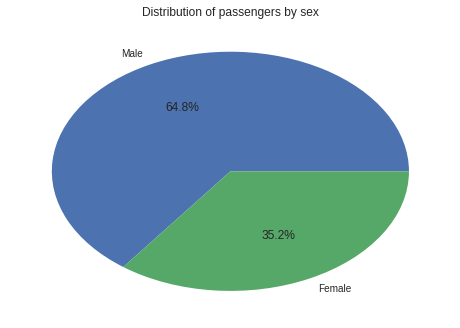

In [14]:
#Visualization of percentages of passengers by sex on pie chart
x = [len(male_passenger),len(female_passenger)]
label = ['Male','Female']
plt.pie(x, labels=label, autopct='%1.01f%%')
plt.title('Distribution of passengers by sex')
plt.show()

Alternatif bir yaş dağılımı bulgusu. Yeni bir fonksiyon tanımlayarak .apply() uygulamasıyla elde edilen farklı yaş gruplarına göre dağılım. Tanımladığım fonksiyona göre 0-15 yaş aralığını 'Child'(çocuk), 16-24 yaş aralığını 'Young'(genç), 24 yaş üstünü 'Adult'(Yetişkin) olarak adlandırdım. .value_counts() fonksiyonu ile bu yaş aralıklaraındaki yolcu sayılarını elde ettim.

In [15]:
#We can also diversify age groups by defining a function:
def age_distribution(x):
    if x>=0 and x <16:
        return 'Child'
    elif x>=16 and x<=24:
        return 'Young'
    else:
        return 'Adult'
    
passenger_df['Age'].apply(age_distribution).value_counts()

Adult    614
Young    194
Child     83
Name: Age, dtype: int64

Farklı yaş aralıklarına göre yolcuların dağılımı. Yuvarlak diyagram ile verinin görselleştirilmesi.

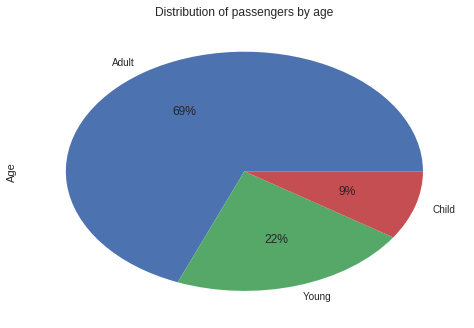

In [16]:
#Visualization of percentages of passengers by age
passenger_df['Age'].apply(age_distribution).value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of passengers by age')
plt.show()

.mean() fonksiyonu ile yetişkin erkek(adult_male_passenger), yetişkin kadın(adult_female_passenger) ve çocuk yolcuların(kid_passenger) yaş ortalamaları.

In [17]:
print 'Average age of adult male passengers:', adult_male_passenger['Age'].mean()
print 'Average age of adult female passengers:', adult_female_passenger['Age'].mean()
print 'Average age of kid passengers:', kid_passenger['Age'].mean()

Average age of adult male passengers: 33.1731234867
Average age of adult female passengers: 32.0
Average age of kid passengers: 6.36951807229


Sosyo-ekonomik bir gösterge olarak yolcuların yolcu sınıflarına(Pclass) göre sayıları.

In [18]:
#Number of passengers according to class
#Pclass: A proxy for socio-economic status 1st = Upper 2nd = Middle, 3rd = Lower)
passenger_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Yolcu sınıflarına göre yolcu sayıları. Yatay çubuk grafik ile verinin görselleştirilmesi:

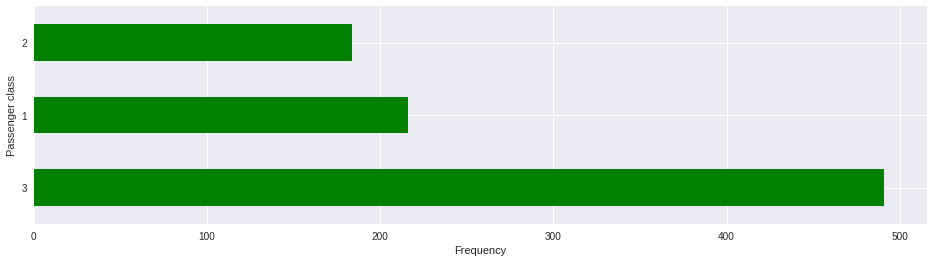

In [19]:
passenger_df['Pclass'].value_counts().plot(kind='barh', color='green', figsize=[16,4])
plt.xlabel('Frequency')
plt.ylabel('Passenger class')
plt.show()

Bu çalışmanın içeriğinde herhangi bir analize tabi tutmasam da her ayrı yolcu sınıfı için veri çerçevelerinin oluşturulması.

In [20]:
#Creating dataframes by passenger class
first_class_passenger = passenger_df[passenger_df['Pclass']==[1]]
second_class_passenger = passenger_df[passenger_df['Pclass']==[2]]
third_class_passenger = passenger_df[passenger_df['Pclass']==[3]]

Yolcuların gemiye biniş limanı bilgisini içeren 'Embarked' sütununun .describe() fonksiyonu ile tanımlanması. Sonuca göre; yolcular 3 ayrı limandan gemiye binmişler, en fazla yolcunun-(644 yolcunun) biniş yaptığı liman 'S' ile tanımlanan Southampton limanı olmuştur. 891 yolcudan ikisinin biniş bilgisi yoktur. 

In [21]:
passenger_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

'Embarked' sütununda eksik iki hücrenin, sütunda en fazla değer olan 'S' ile doldurulması.

In [22]:
#Filling the two missing values in 'Embarked' with the most occurred value, which is "S"
passenger_df['Embarked'] = passenger_df['Embarked'].fillna('S')

Yolcuların gemiye biniş limanlarına göre sayılarının çubuk grafik ile görselleştirilmesi.

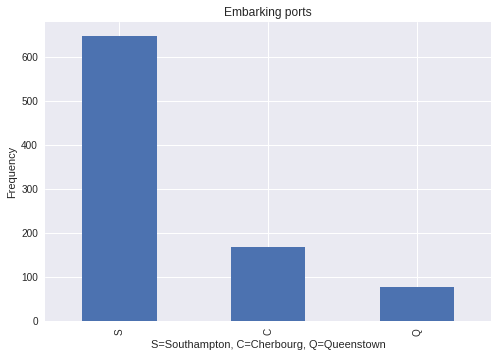

In [23]:
#Visualization of number of passengers by embarking ports 
passenger_df['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarking ports')
plt.ylabel('Frequency')
plt.xlabel('S=Southampton, C=Cherbourg, Q=Queenstown')
plt.show()

Hayatta kalma/kalmama durumunun analizi. Veri setinde yer alan 891 yolcunun 549'u hayatını kaybederken 342'si hayatta kalmıştır.

In [24]:
#ANALYZING OF SURVIVINGS
#Number of surviveds and not-surviveds
passenger_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Hayatını kaybeden(0) - hayatta kalan(1) yolcu sayılarının çubuk grafik ile gösterimi.

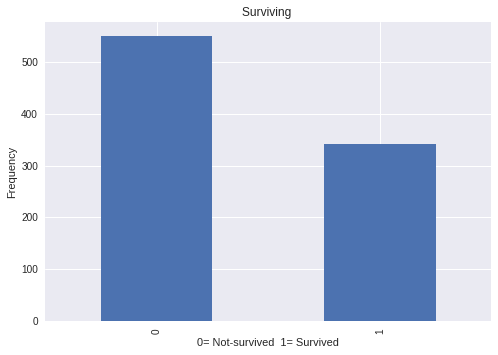

In [25]:
passenger_df['Survived'].value_counts().plot(kind='bar', title='Surviving ')
plt.xlabel('0= Not-survived  1= Survived')
plt.ylabel('Frequency')
plt.show()

Cinsiyete göre hayatını kaybeden(0) ve kurtulan yolcuların(1) sayıları.

In [26]:
#Number of survivings by sex
passenger_df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Cinsiyete göre hayatını kaybeden(0) ve kurtulan yolcuların(1) sayılarının görselleştirilmesi.

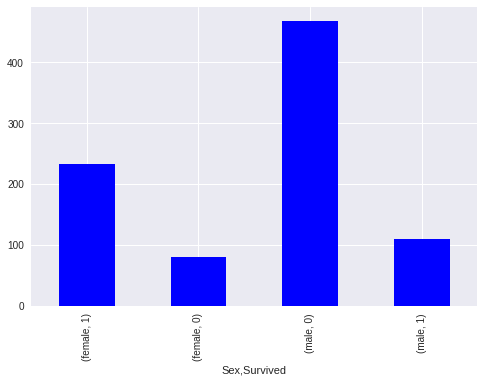

In [27]:
#Visualization of survivings by sex
passenger_df.groupby('Sex')['Survived'].value_counts().plot(kind='bar', stacked=True, colormap='winter')
plt.show()

Yukarıdaki görselleştirmenin; iki sütuna('Sex', 'Survived') .groupby() fonksiyonu ile size() ve unstack() fonksiyonlarının uygulanması sonucunda hayatta kalma('Survived') değişekeninin tek çubuk üzerinde 
"stacked=True" ile daha iyi bir görsele dönüştürülmesi.

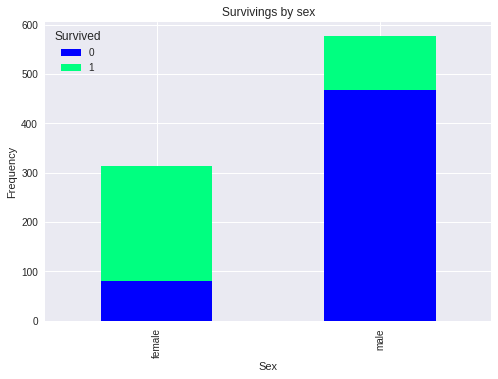

In [28]:
#Better visualization of survivings by sex
sex_survived = passenger_df.groupby(['Sex', 'Survived'])
sex_survived.size().unstack().plot(kind='bar', stacked=True, colormap='winter')
plt.ylabel('Frequency')
plt.title('Survivings by sex')
plt.show()

Hayatta kalan yetişkin kadın ve yetişkin erkek yolcuların oranı. Buna göre yetişkin kadın yolcuların 
%75'i hayatta kalırken, yetişken erkek yolcuların %84'ü hayatını kaybetmiştir.

In [29]:
print 'Mean of survived adult female passengers:', adult_female_passenger['Survived'].mean()
print 'Mean of survived adult male passengers:', adult_male_passenger['Survived'].mean()

Mean of survived adult female passengers: 0.756457564576
Mean of survived adult male passengers: 0.163873370577


Yolcu sınıflarına göre hayatta kalan/hayatını kaybeden yolcu sayılarını bulmada
size() ve unstack() fonksiyonlarının kullanımı.
Öncelikle .groupby() ile 'Pclass' ve 'Survived' sütunlarını grupluyoruz.

In [30]:
#Usage of size(),unstack() while examining survivings by passenger class
class_survived = passenger_df.groupby(['Pclass', 'Survived'])

size() ile yolcu sınıflarına göre hayatını kaybeden(0) ve hayatta kalanların(1) sayıları.

In [31]:
#size() - to count number of rows in each grouping.
class_survived.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

unstack() ile elde edilen sonucu daha okunabilir bir formata dönüştürüyoruz.

In [32]:
#unstack() - to convert results into a more readable format.
class_survived.size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Yolcu sınıflarına göre hayatını kaybeden(0) ve hayatta kalan(1) yolcu sayılarının görselleştirilmesi.

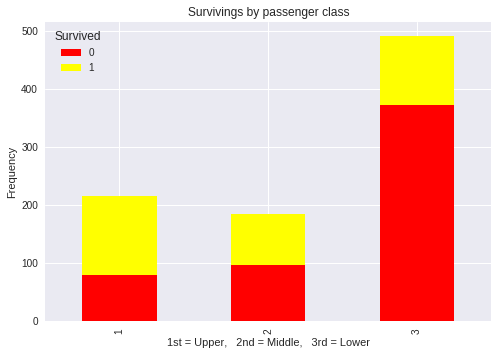

In [33]:
#Visualization of survivings by passenger class
class_survived.size().unstack().plot(kind='bar', stacked=True, colormap='autumn')
plt.xlabel('1st = Upper,   2nd = Middle,   3rd = Lower')
plt.ylabel('Frequency')
plt.title('Survivings by passenger class')
plt.show()

Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan erkek yolcu sayıları tablosu.

In [34]:
#Numbers of survived/not survived passengers by sex and passenger class
print 'Surviving numbers of male passengers by passenger class:',
male_passenger.groupby(['Pclass','Survived']).size().unstack()

Surviving numbers of male passengers by passenger class:

Survived,0,1
Pclass,,
1,77,45
2,91,17
3,300,47


Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan kadın yolcu sayıları tablosu.

In [35]:
print 'Surviving numbers of female passengers by passenger class:',
female_passenger.groupby(['Pclass','Survived']).size().unstack()

Surviving numbers of female passengers by passenger class:

Survived,0,1
Pclass,,
1,3,91
2,6,70
3,72,72


Yolcu sınıflarına göre hayatını kaybeden/hayatta kalan erkek ve kadın yolcu sayılarının görselleştirilmesi.

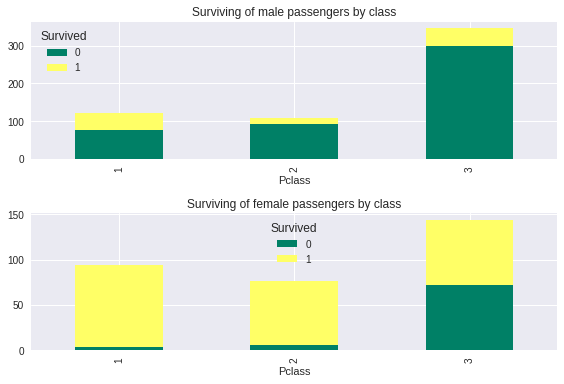

In [36]:
#Visualization of male and female survivings by passenger class
fig, axes = plt.subplots(nrows=2, ncols=1)
male_passenger.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', title='Surviving of male passengers by class',
                                                                    stacked=True, colormap='summer', ax=axes[0])
female_passenger.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', title='Surviving of female passengers by class',
                                                                      stacked=True, colormap='summer', ax=axes[1])
plt.tight_layout()
plt.show()

Yalnız yolcuları(alone_passenger) gösteren veri çerçevesinin oluşturulması.
'Yalnız yolcu'dan kasıt, gemide kardeş/eş ve ebeveyn/çocuğu olmayan yolculardır. Buna göre 'SibSp' ve 'Parch' değerlerinin her ikisi de sıfır olan yolcular, oluşturulan "alone_passenger" veri çerçevesine dahildir. 
.head() ile, oluşturulan veri çerçevesinin ilk 7 satırının görünümü.

In [37]:
#Findings of alone passengers (without siblings/spouses and parents/children aboard the Titanic)
without_sibsp_passenger = passenger_df[passenger_df['SibSp']==[0]]
alone_passenger = without_sibsp_passenger[without_sibsp_passenger['Parch']==[0]]
#Checking first 7 rows of alone_passenger
alone_passenger.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,1,3,female,26.0,0,0,7.9250,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
11,1,1,female,58.0,0,0,26.5500,S
12,0,3,male,20.0,0,0,8.0500,S
14,0,3,female,14.0,0,0,7.8542,S


Ailesiyle birlikte yolculuk eden yolcuları(family_passenger) gösteren veri çerçevesinin oluşturulması.
Bu veri çerçevesi, veri setimizden(passenger_df) yalnız yolcuların(alone_passenger) çıkarılmasıyla elde edilmiştir.
Buna göre 'SibSp' veya 'Parch' değerlerinden herhangi biri sıfırdan büyük bir değere sahip yolcular bu veri çerçevesine(family_passenger) dahildir. .tail() ile, oluşturulan veri çerçevesinin son 6 satırının görünümü.

In [38]:
#Findings of passengers with family (with siblings/spouses or parents/children aboard the Titanic)
family_passenger = passenger_df.drop(alone_passenger.index[:])
#Checking last 6 rows of family_passenger
family_passenger.tail(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
871,1,1,female,47.0,1,1,52.5542,S
874,1,2,female,28.0,1,0,24.0000,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
885,0,3,female,39.0,0,5,29.1250,Q
888,0,3,female,NaN,1,2,23.4500,S


Cinsiyete göre; yalnız seyahat eden,
                ailesiyle birlikte seyahat eden yolcuların hayatta kalma oranları.
                
Yolcu sınıfına göre; yalnız seyahat eden,
                     ailesiyle birlikte seyahat eden yolcuların hayatta kalma oranları.

In [39]:
#Mean of survived alone passengers and passengers with family by sex
print 'Mean of survived alone passengers:', alone_passenger.groupby('Sex')['Survived'].mean()
print 'Mean of survived passengers with family:', family_passenger.groupby('Sex')['Survived'].mean()
print ''
print ''
#Mean of survived alone passengers and passengers with family by passenger class
print 'Mean of survived alone passengers:', alone_passenger.groupby('Pclass')['Survived'].mean()
print 'Mean of survived passengers with family:', family_passenger.groupby('Pclass')['Survived'].mean()

Mean of survived alone passengers: Sex
female    0.785714
male      0.155718
Name: Survived, dtype: float64
Mean of survived passengers with family: Sex
female    0.712766
male      0.271084
Name: Survived, dtype: float64


Mean of survived alone passengers: Pclass
1    0.532110
2    0.346154
3    0.212963
Name: Survived, dtype: float64
Mean of survived passengers with family: Pclass
1    0.728972
2    0.637500
3    0.299401
Name: Survived, dtype: float64


Ödenen bilet ücretlerine göre hayatta kalma oranlarının bulunması.
Bilet ücretleri (0'dan 512'ye) büyük farklarla çeşitlilik göstermektedir. Bu nedenle, bilet ücreti değerleri eşit aralıklara bölünerek hayatta kalma oranları bulunmuştur. Öncelikle ücret sütununda yer alan boş hücreler ücret('Fare') ortalama değeri ile doldurulmuştur.

In [40]:
#Fares varies widely. Therefore I used pandas.qcut for discretizing fares into equal buckets.
#Firstly, filling missing values of 'Fare'
passenger_df['Fare'].fillna(passenger_df['Fare'].dropna().median(), inplace=True)

.qcut() fonksiyonu ile bilet ücret('Fare') değerleri yolcu sayılarına göre dört eşit gruba ayrılmıştır. Buna göre, oluşan ücret bandları('FareBand') "0-7.91", "7.91-14.454", "14.454-31", "31-512.329" olmuştur. 

In [41]:
#Discretizing fares of passengers in 4 equal buckets with .qcut
passenger_df['FareBand'] = pd.qcut(passenger_df['Fare'], 4)
passenger_df['FareBand'].value_counts().sort_values(ascending=False)

(7.91, 14.454]    224
[0, 7.91]         223
(14.454, 31]      222
(31, 512.329]     222
Name: FareBand, dtype: int64

Oluşturulan ücret bandlarına göre hayatta kalma oranları. Bu sonuca göre yolcular arasında ödenen bilet ücretleri arttıkça hayatta kalma oranları da artmıştır. 

In [42]:
#Mean of survived passengers by fares
passenger_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand',
                                                                                                ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081
